# K-Means Clustering

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
num = LabelEncoder()
sns.set() # for plot styling

In [2]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [3]:
answer = X_test['custId']

In [4]:
X_train.drop(columns='Satisfied',inplace=True)

In [5]:
X_train['gender'] = num.fit_transform(X_train['gender'])
X_train['Married'] = num.fit_transform(X_train['Married'])
X_train['Children'] = num.fit_transform(X_train['Children'])
X_train['Channel1'] = X_train['Channel1'].replace({'No tv connection':0,'No':1,'Yes':2})
X_train['Channel2'] = X_train['Channel2'].replace({'No tv connection':0,'No':1,'Yes':2})
X_train['Channel3'] = X_train['Channel3'].replace({'No tv connection':0,'No':1,'Yes':2})
X_train['Channel4'] = X_train['Channel4'].replace({'No tv connection':0,'No':1,'Yes':2})
X_train['Channel5'] = X_train['Channel5'].replace({'No tv connection':0,'No':1,'Yes':2})
X_train['Channel6'] = X_train['Channel6'].replace({'No tv connection':0,'No':1,'Yes':2})
X_train['Internet'] = num.fit_transform(X_train['Internet'])
X_train['HighSpeed'] = X_train['HighSpeed'].replace({'No internet':0,'No':1,'Yes':2})
X_train['AddedServices'] = num.fit_transform(X_train['AddedServices'])
X_train['Subscription'].replace({'Monthly':1,'Annually':12,'Biannually':6},inplace=True)
X_train['TotalCharges'].fillna(X_train['TotalCharges'].mean(),inplace=True)

In [6]:
X_test['gender'] = num.fit_transform(X_test['gender'])
X_test['Married'] = num.fit_transform(X_test['Married'])
X_test['Children'] = num.fit_transform(X_test['Children'])
X_test['Channel1'] = X_test['Channel1'].replace({'No tv connection':0,'No':1,'Yes':2})
X_test['Channel2'] = X_test['Channel2'].replace({'No tv connection':0,'No':1,'Yes':2})
X_test['Channel3'] = X_test['Channel3'].replace({'No tv connection':0,'No':1,'Yes':2})
X_test['Channel4'] = X_test['Channel4'].replace({'No tv connection':0,'No':1,'Yes':2})
X_test['Channel5'] = X_test['Channel5'].replace({'No tv connection':0,'No':1,'Yes':2})
X_test['Channel6'] = X_test['Channel6'].replace({'No tv connection':0,'No':1,'Yes':2})
X_test['Internet'] = num.fit_transform(X_test['Internet'])
X_test['HighSpeed'] = X_test['HighSpeed'].replace({'No internet':0,'No':1,'Yes':2})
X_test['AddedServices'] = num.fit_transform(X_test['AddedServices'])
X_test['Subscription'].replace({'Monthly':1,'Annually':12,'Biannually':6},inplace=True)
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'],errors='coerce')
X_test['TotalCharges'].fillna(X_test['TotalCharges'].mean(),inplace=True)

In [7]:
scaler = MinMaxScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [8]:
X_test

,custId,gender,SeniorCitizen,Married,Children,TVConnection,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Internet,HighSpeed,AddedServices,Subscription,tenure,PaymentMethod,MonthlyCharges,TotalCharges
0,3904,0,0,0,0,DTH,2,1,2,1,1,1,1,1,1,1,0.722222,Net Banking,0.409950,0.349552
1,5496,0,0,1,0,Cable,2,1,1,1,1,1,1,1,1,1,0.125000,Net Banking,0.611940,0.086703
2,497,0,0,1,1,Cable,2,2,1,1,1,1,1,1,1,1,0.138889,Net Banking,0.702488,0.105233
3,4260,0,0,0,0,DTH,2,2,1,1,1,2,1,1,1,1,0.027778,Net Banking,0.522388,0.014803
4,4748,1,0,0,0,Cable,2,2,2,1,2,2,1,2,1,1,0.625000,Credit card,0.897512,0.571539
5,1067,0,0,1,0,Cable,1,2,1,2,2,1,1,2,1,1,0.416667,Credit card,0.754726,0.321905
6,5808,0,0,0,0,Cable,1,1,1,2,1,1,1,1,1,1,0.055556,Bank transfer,0.581095,0.036378
7,6281,0,0,0,0,Cable,1,1,1,1,1,2,1,2,1,1,0.152778,Bank transfer,0.604478,0.105216
8,1787,1,0,0,0,No,0,0,0,0,0,0,1,2,1,6,0.944444,Bank transfer,0.058706,0.171032
9,3183,0,1,1,0,DTH,2,2,2,1,1,1,0,0,1,1,0.250000,Net Banking,0.299502,0.091511


In [9]:
X_encoded = pd.get_dummies(X_train['PaymentMethod']) # Use get_dummies
Xf_encoded = pd.get_dummies(X_test['PaymentMethod'])
X1_encoded = pd.get_dummies(X_train['TVConnection']) # Use get_dummies
X1f_encoded = pd.get_dummies(X_test['TVConnection'])

In [10]:
X_train = pd.DataFrame(np.concatenate([X_train,X_encoded,X1_encoded],axis=1))
X_test = pd.DataFrame(np.concatenate([X_test,Xf_encoded,X1f_encoded],axis=1))

In [11]:
X_train.drop(columns=[5,17],inplace=True)

In [12]:
X_test.drop(columns=[5,17],inplace=True)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 25 columns):
0     4930 non-null object
1     4930 non-null object
2     4930 non-null object
3     4930 non-null object
4     4930 non-null object
6     4930 non-null object
7     4930 non-null object
8     4930 non-null object
9     4930 non-null object
10    4930 non-null object
11    4930 non-null object
12    4930 non-null object
13    4930 non-null object
14    4930 non-null object
15    4930 non-null object
16    4930 non-null object
18    4930 non-null object
19    4930 non-null object
20    4930 non-null object
21    4930 non-null object
22    4930 non-null object
23    4930 non-null object
24    4930 non-null object
25    4930 non-null object
26    4930 non-null object
dtypes: object(25)
memory usage: 963.0+ KB


In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

In [15]:
answer=pd.DataFrame(answer)
answer['Satisfied']=pd.DataFrame(y_pred)
answer

,custId,Satisfied
0,3904,0
1,5496,0
2,497,1
3,4260,0
4,4748,0
5,1067,1
6,5808,0
7,6281,0
8,1787,1
9,3183,1


In [16]:
answer.to_csv('Kmeans_minmax.csv',index=False)

In [140]:
sub6 = pd.read_csv('sub6.csv')

In [143]:
sub6['Satisfied'].value_counts()

0    1411
1     702
Name: Satisfied, dtype: int64

In [155]:
from sklearn.metrics import precision_score

In [127]:
precision_score(y_pred, X['Satisfied'])

0.5302402651201326

By eye, it is relatively easy to pick out the four clusters.
The *k*-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

Let's visualize the results by plotting the data colored by these labels.
We will also plot the cluster centers as determined by the *k*-means estimator:

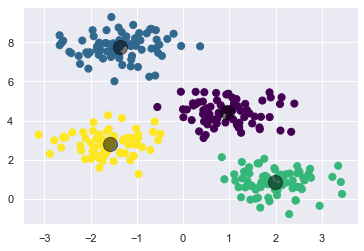

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.
But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly.
Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to k-means involves an intuitive iterative approach known as *expectation–maximization*.

## k-Means Algorithm: Expectation–Maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.
The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

We can visualize the algorithm as shown in the following figure.
For the particular initialization shown here, the clusters converge in just three iterations.

<img src='expectation-maximization.png'>

Now, let us implement the k-Means algorithm:

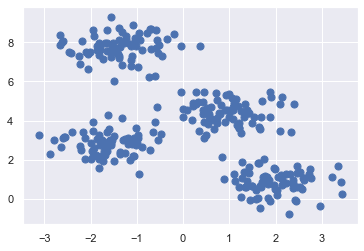

In [5]:
from sklearn.metrics import pairwise_distances_argmin # You can use this to find clostest center

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose cluster centers with seed set to rseed
    
    centers = None
    
    while True:
        # 2a. Assign labels based on closest center
        labels = None
        
        # 2b. Find new centers from means of points
        new_centers = None
        
        # 2c. Check for convergence
        if 'condition':
            break
            
        # 2d. Update centers to new_centers
        centers = None
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Most well-tested implementations will do a bit more than this under the hood, but the preceding function gives the gist of the expectation–maximization approach.

### Caveats of expectation–maximization

There are a few issues to be aware of when using the expectation–maximization algorithm.

#### The globally optimal result may not be achieved
First, although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the *global* best solution.
For example, if we use a different random seed in our simple procedure, the particular starting guesses lead to poor results:

In [ ]:
# Change the rseed value and see the differences
centers, labels = find_clusters(X, 4, rseed=3)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Here the E–M approach has converged, but has not converged to a globally optimal configuration. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (set by the ``n_init`` parameter, which defaults to 10).

#### The number of clusters must be selected beforehand
Another common challenge with *k*-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data.
For example, if we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters:

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Whether the result is meaningful is a question that is difficult to answer definitively; one approach that is rather intuitive, but that we won't discuss further here, is called [silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Another method to find best K is to iteratively train models with k value from 1 to 10, then plot the inertias of the models on a graph and choose the K where we observe an elbow. Inertia of a model is the sum of squared distances of samples to their closest cluster center.

In [ ]:
K = range(1,10) 

inertias = []
for k in K: 
    #Building and fitting the model 
    kmeans = KMeans(n_clusters=k).fit(X)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using inertia') 
plt.show() 
  

Alternatively, you might use a more complicated clustering algorithm which has a better quantitative measure of the fitness per number of clusters (e.g., Gaussian mixture models) or which *can* choose a suitable number of clusters (e.g., DBSCAN, mean-shift, or affinity propagation, all available in the ``sklearn.cluster`` submodule)

#### k-means is limited to linear cluster boundaries
The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries.
Consider the following data, along with the cluster labels found by the typical k-means approach:

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

This situation is reminiscent of the discussion in Support Vector Machines, where we used a kernel transformation to project the data into a higher dimension where a linear separation is possible.
We might imagine using the same trick to allow k-means to discover non-linear boundaries.

One version of this kernelized k-means is implemented in Scikit-Learn within the ``SpectralClustering`` estimator.
It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm:

In [ ]:
warnings.filterwarnings("ignore")
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

We see that with this kernel transform approach, the kernelized *k*-means is able to find the more complicated nonlinear boundaries between clusters.

#### k-means can be slow for large numbers of samples
Because each iteration of k-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows.
You might wonder if this requirement to use all data at each iteration can be relaxed; for example, you might just use a subset of the data to update the cluster centers at each step.
This is the idea behind batch-based k-means algorithms, one form of which is implemented in ``sklearn.cluster.MiniBatchKMeans``.
The interface for this is the same as for standard ``KMeans``; we will see an example of its use as we continue our discussion.

### Task: K-means for color compression

One interesting application of clustering is in color compression within images.
For example, imagine you have an image with millions of colors.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

For example, consider the image shown in the following figure, which is from the Scikit-Learn ``datasets`` module (for this to work, you'll have to have the ``pillow`` Python package installed).

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

The image itself is stored in a three-dimensional array of size ``(height, width, RGB)``, containing red/blue/green contributions as integers from 0 to 255:

In [ ]:
china.shape

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space.
Reshape the data to ``[n_samples x n_features]``, and rescale the colors so that they lie between 0 and 1:

In [ ]:
data = None
data.shape

We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space.
Because we are dealing with a very large dataset, we will use the mini batch k-means, which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm:

In [ ]:
from sklearn.cluster import MiniBatchKMeans

kmeans = None

new_colors = None

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

The result is a re-coloring of the original pixels, where each pixel is assigned the color of its closest cluster center.
Plotting these new colors in the image space rather than the pixel space shows us the effect of this:

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Some detail is certainly lost in the rightmost panel, but the overall image is still easily recognizable.
This image on the right achieves a compression factor of around 1 million!
While this is an interesting application of k-means, there are certainly better way to compress information in images.
But the example shows the power of thinking outside of the box with unsupervised methods like k-means.